In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [3]:
with open("checkpoints_study_2025-03-09_22-08-22/study_details.json") as f:
    data = json.load(f)

In [4]:
hyperparam_data = []
exclude_keys = ["checkpoint_path", "model_name", "trainable_parameters"]

for trial, val in data.items():    
    for k in exclude_keys:
        if k in val:
            val.pop(k)
    hyperparam_data.append(val)

In [5]:
# Create DataFrame
df = pd.DataFrame(hyperparam_data)
df

,batch_size,optimizer_type,scheduler_type,weight_decay,learning_rate,h_flip,rotation,best_val_accuracy,T_max,eta_min,factor,patience
0,128,SGD,OneCycleLR,0.0001,0.028134,0.431537,24,0.8952,NaN,NaN,NaN,NaN
1,128,Adam,CosineAnnealingLR,0.0005,0.000111,0.972133,1,0.7515,44.0,4.027312e-07,NaN,NaN
2,256,SGD,ReduceLROnPlateau,0.0005,0.047752,0.577285,15,0.8883,NaN,NaN,0.814281,8.0
3,128,Adam,ReduceLROnPlateau,0.0005,0.000463,0.121800,3,NaN,NaN,NaN,0.313229,3.0


In [6]:
# Plot hyperparameter vs validation accuracy
def plot_hyperparam_vs_acc(df, hyperparameter_column):
    plt.figure(figsize=(10, 6))
    
    sns.scatterplot(data=df, x=hyperparameter_column, y="best_val_accuracy")
    plt.title(f'{hyperparameter_column} vs Validation Accuracy')
    plt.xlabel(hyperparameter_column)
    plt.ylabel('Validation Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

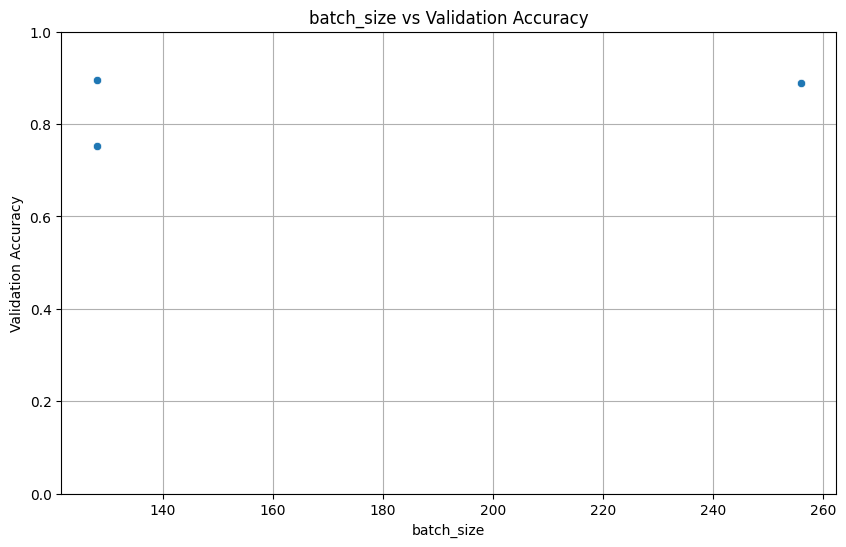

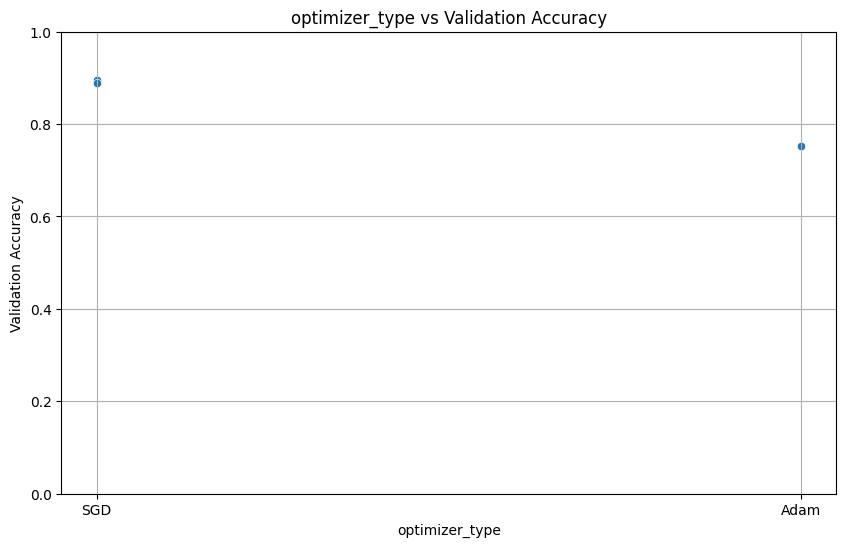

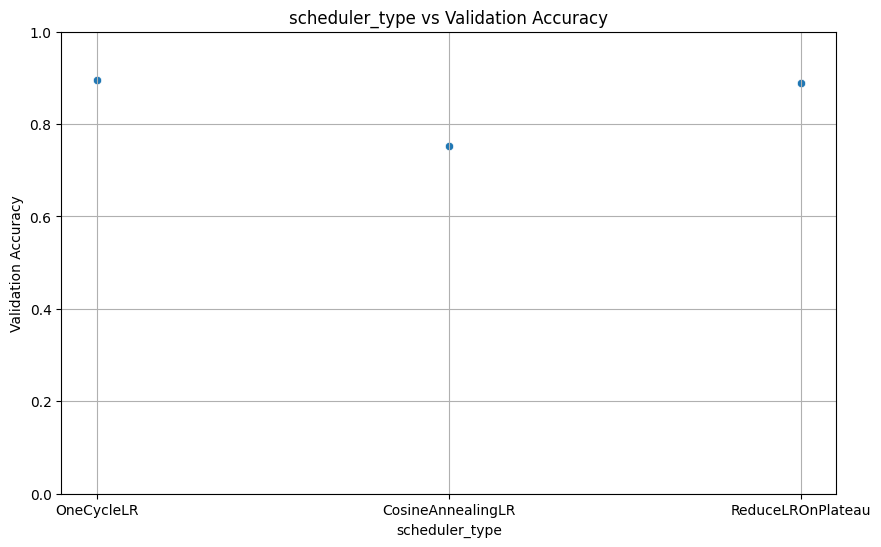

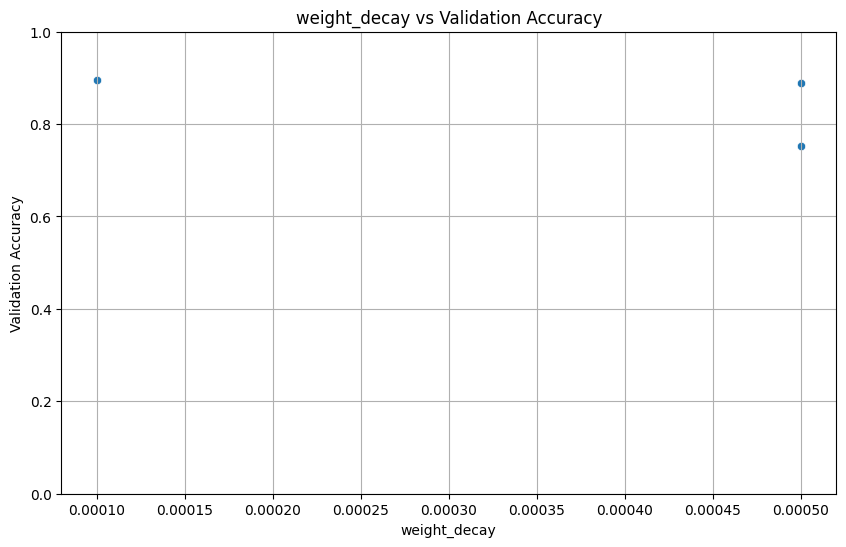

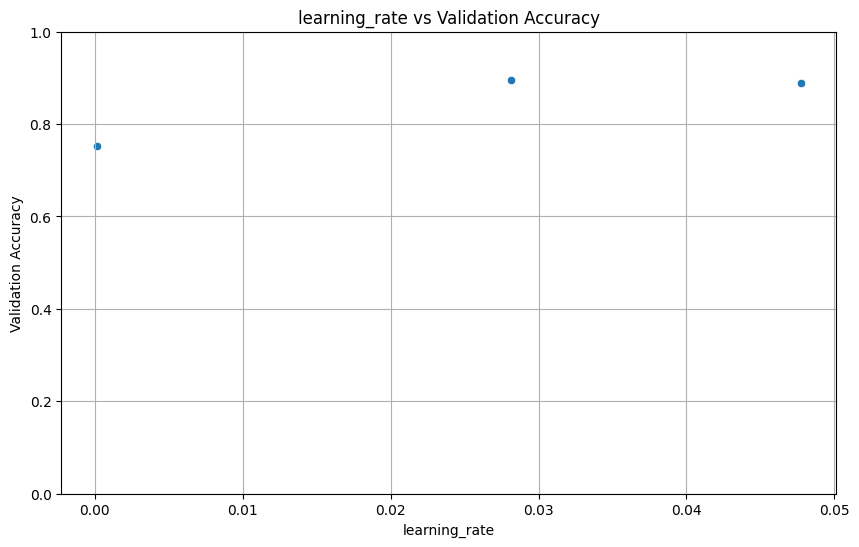

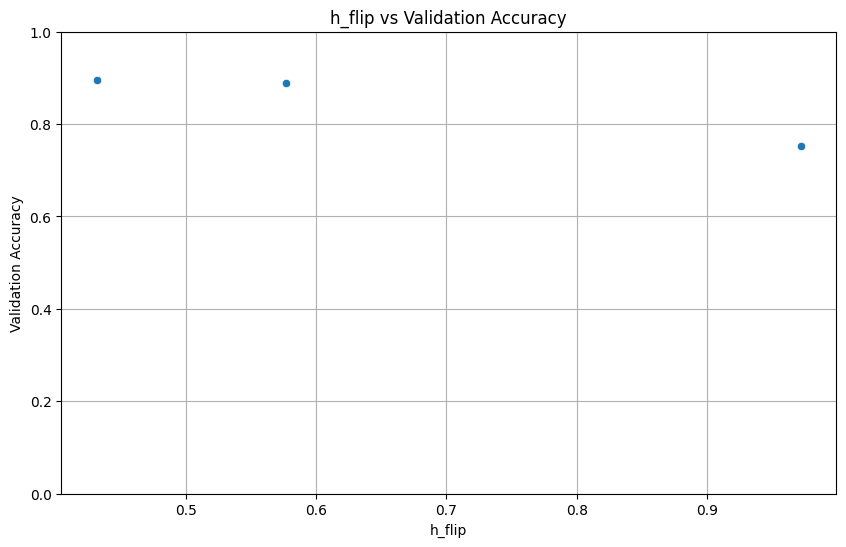

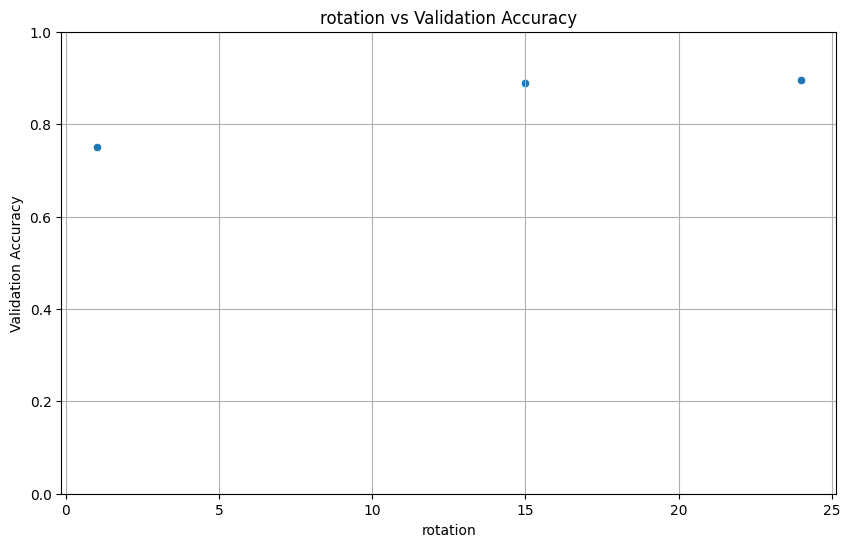

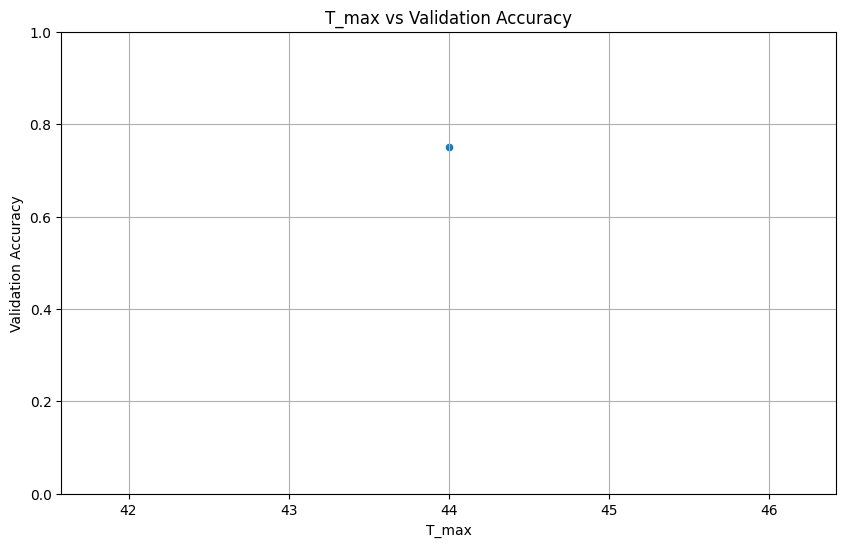

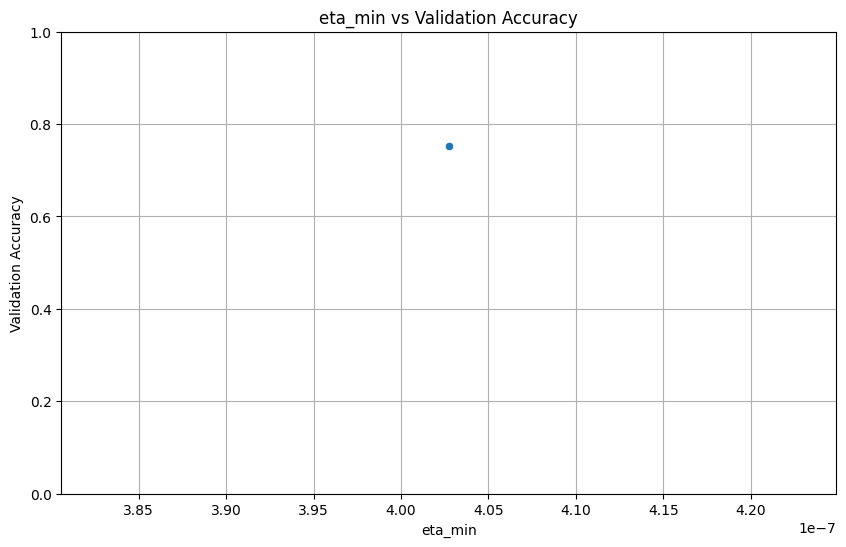

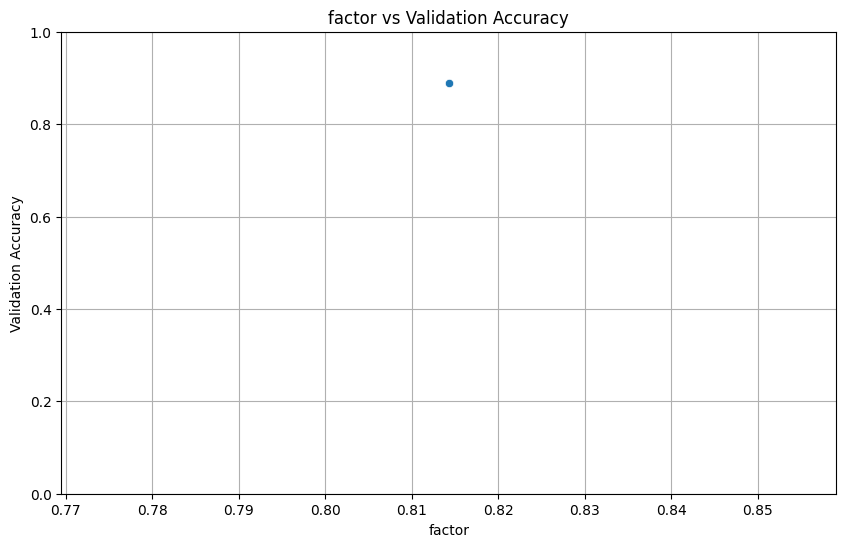

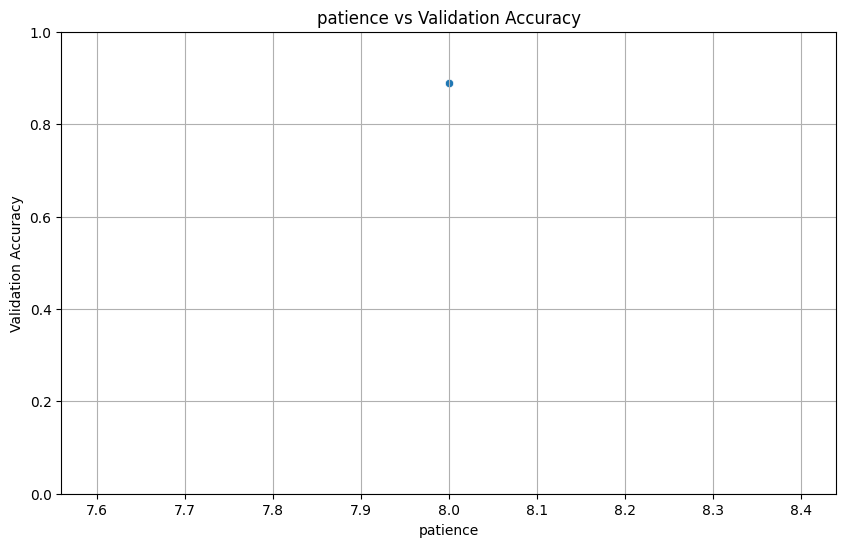

In [7]:
for param in df.columns.tolist():
    if param != "best_val_accuracy":
        plot_hyperparam_vs_acc(df, param)